In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_datareader as pdr 
#package that allows us to create a pandas DataFrame object by using various data sources from the internet.
#It is popularly used for working with realtime stock price datasets.

In [2]:
symbol = 'MSFT'

In [3]:
stocks = pdr.get_data_tiingo(symbol , api_key="430ecc8eb364de92ba410eb521b0dea53178bf08")

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_2272\2602103524.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  stocks = pdr.get_data_tiingo(symbol , api_key="430ecc8eb364de92ba410eb521b0dea53178bf08")


In [4]:
stocks.to_csv('MSTF.csv')

In [5]:
stocks=pd.read_csv('MSTF.csv')

In [6]:
stocks.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-06-18 00:00:00+00:00,100.86,101.11,99.42,100.01,23586037,95.363958,95.600336,94.002427,94.560276,23586037,0.0,1.0
1,MSFT,2018-06-19 00:00:00+00:00,100.86,101.00,99.50,99.65,28653087,95.363958,95.496330,94.078067,94.219894,28653087,0.0,1.0
2,MSFT,2018-06-20 00:00:00+00:00,101.87,102.52,101.12,101.37,26180792,96.318922,96.933502,95.609791,95.846168,26180792,0.0,1.0
3,MSFT,2018-06-21 00:00:00+00:00,101.14,102.46,100.88,102.08,23198188,95.628701,96.876772,95.382869,96.517478,23198188,0.0,1.0
4,MSFT,2018-06-22 00:00:00+00:00,100.41,100.77,99.63,100.41,38923105,94.938480,95.278863,94.200983,94.938480,38923105,0.0,1.0


In [7]:
stocks.shape

(1257, 14)

In [8]:
stocks.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,210.690203,212.840899,208.302977,210.605251,3.018409e+07,206.478751,208.587849,204.138024,206.394827,3.018409e+07,0.008799,1.0
std,71.523234,72.214265,70.740100,71.484227,1.280599e+07,72.350525,73.053248,71.554891,72.310003,1.280599e+07,0.069947,0.0
min,94.130000,97.970000,93.960000,95.140000,8.989150e+06,89.739436,93.400324,89.577365,90.702326,8.989150e+06,0.000000,1.0
25%,138.400000,139.670000,136.930000,138.850000,2.229772e+07,133.186849,134.637296,131.975985,133.595914,2.229772e+07,0.000000,1.0
50%,218.590000,220.890000,216.010000,218.470000,2.701873e+07,213.733595,216.581241,211.432207,213.616261,2.701873e+07,0.000000,1.0
75%,268.720000,271.840000,265.160000,267.780000,3.417605e+07,266.100377,269.095805,262.482719,264.833232,3.417605e+07,0.000000,1.0
max,343.110000,349.670000,342.200000,344.620000,1.112421e+08,338.297561,344.765551,337.400325,339.786382,1.112421e+08,0.680000,1.0


In [9]:
stocks.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [10]:
Mstocks=stocks.reset_index()['close']

In [11]:
Mstocks.head()

0    100.86
1    100.86
2    101.87
3    101.14
4    100.41
Name: close, dtype: float64

Text(0.5, 1.0, 'Closing Price of the Stock')

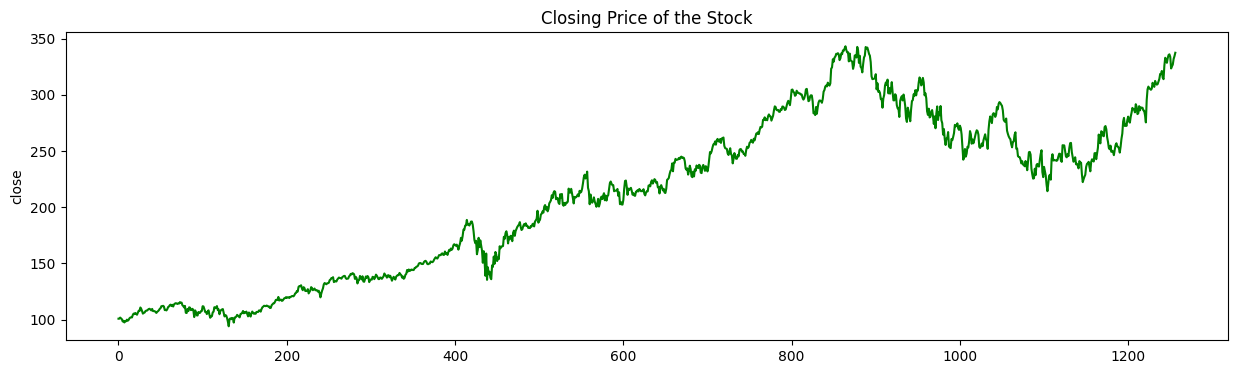

In [12]:
plt.figure(figsize=(15,4))

sns.lineplot(stocks["close"] , color="green")
plt.title("Closing Price of the Stock")

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_2272\3642435161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stocks["close"] , color="blue")


Text(0.5, 1.0, 'Closing Price of the Stock')

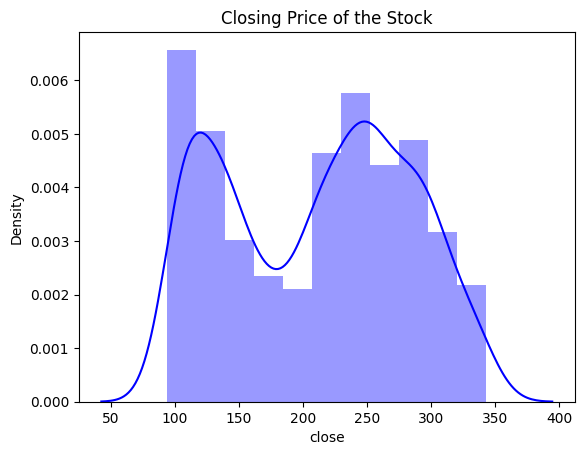

In [13]:
sns.distplot(stocks["close"] , color="blue")
plt.title("Closing Price of the Stock")

# Standardisation of the Dataset:-

In [14]:
#converts the structure of different datasets into one common format of data.

from sklearn.preprocessing import StandardScaler

In [15]:
ST = StandardScaler()

In [16]:
Mstocks = ST.fit_transform(np.array(Mstocks).reshape(-1, 1))

In [17]:
Mstocks                    #Close column data

array([[-1.53619894],
       [-1.53619894],
       [-1.52207204],
       ...,
       [ 1.69466638],
       [ 1.72879475],
       [ 1.7714552 ]])

# Marking Target and Predictor Variable:-

In [18]:
x_size=int(len(Mstocks)*0.75)       #x_size is the training size of the close column

y_size=len(Mstocks)-x_size      #y_size is the testing size of the close column


In [19]:
x_size #training size

942

In [20]:
y_size #testing size

315

In [21]:
x_data, y_data = Mstocks[:x_size,:],  Mstocks[x_size:len(Mstocks),:]

In [22]:
x_data.size         #training data size

942

In [23]:
y_data.size          #testing data size

315

In [24]:
x_data

array([[-1.53619894e+00],
       [-1.53619894e+00],
       [-1.52207204e+00],
       [-1.53228257e+00],
       [-1.54249311e+00],
       [-1.57074692e+00],
       [-1.56109587e+00],
       [-1.58263590e+00],
       [-1.56739003e+00],
       [-1.56766977e+00],
       [-1.54808792e+00],
       [-1.56151548e+00],
       [-1.55158468e+00],
       [-1.53200283e+00],
       [-1.52235178e+00],
       [-1.51857528e+00],
       [-1.52053346e+00],
       [-1.48962211e+00],
       [-1.47227819e+00],
       [-1.47955145e+00],
       [-1.46500493e+00],
       [-1.47661417e+00],
       [-1.48668484e+00],
       [-1.46052908e+00],
       [-1.43675112e+00],
       [-1.44108710e+00],
       [-1.39674820e+00],
       [-1.41367251e+00],
       [-1.44080736e+00],
       [-1.47311741e+00],
       [-1.46318662e+00],
       [-1.46038921e+00],
       [-1.44234593e+00],
       [-1.43577203e+00],
       [-1.43451319e+00],
       [-1.42402292e+00],
       [-1.41549083e+00],
       [-1.41297316e+00],
       [-1.4

In [25]:
y_data

array([[1.06944589],
       [1.17071203],
       [1.18232127],
       [1.25519372],
       [1.23743019],
       [1.30596666],
       [1.24204591],
       [1.30652615],
       [1.30065159],
       [1.39884058],
       [1.46471952],
       [1.44303961],
       [1.36541156],
       [1.38093717],
       [1.45856522],
       [1.40135825],
       [1.24218578],
       [1.26834154],
       [1.20679858],
       [1.0430104 ],
       [0.99825188],
       [1.0760198 ],
       [0.96706079],
       [0.97671185],
       [1.04356988],
       [1.05839614],
       [0.98076809],
       [0.88593599],
       [0.97950926],
       [0.83264538],
       [1.01447684],
       [1.10413374],
       [0.93475074],
       [1.03196064],
       [0.99433551],
       [1.1090292 ],
       [0.93237295],
       [0.89572691],
       [0.7537585 ],
       [0.82257472],
       [0.69739075],
       [0.62465817],
       [0.70536336],
       [0.71067843],
       [0.78508946],
       [0.60689463],
       [0.59374682],
       [0.585

# Splitting column for training and testing:-

In [26]:
def create_dataset(dataset, time_step=1):           #dataset matrix
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


In [27]:
time_step = 100
X_train, y_train = create_dataset(x_data, time_step)
X_test, y_test = create_dataset(y_data, time_step)

In [28]:
X_train

array([[-1.53619894, -1.53619894, -1.52207204, ..., -1.46206765,
        -1.44318516, -1.44024788],
       [-1.53619894, -1.52207204, -1.53228257, ..., -1.44318516,
        -1.44024788, -1.38094285],
       [-1.52207204, -1.53228257, -1.54249311, ..., -1.44024788,
        -1.38094285, -1.38388013],
       ...,
       [ 1.28764365,  1.30806472,  1.35114479, ...,  1.10735076,
         0.95419272,  0.91139239],
       [ 1.30806472,  1.35114479,  1.3642926 , ...,  0.95419272,
         0.91139239,  1.08832839],
       [ 1.35114479,  1.3642926 ,  1.35282323, ...,  0.91139239,
         1.08832839,  1.04762612]])

In [29]:
y_train

array([-1.38094285e+00, -1.38388013e+00, -1.41437186e+00, -1.45213686e+00,
       -1.45115777e+00, -1.47871223e+00, -1.44640217e+00, -1.43227527e+00,
       -1.48360769e+00, -1.52430996e+00, -1.50472811e+00, -1.50528759e+00,
       -1.45773167e+00, -1.44836036e+00, -1.39269196e+00, -1.40569990e+00,
       -1.39590898e+00, -1.37912453e+00, -1.42905825e+00, -1.41968694e+00,
       -1.48081028e+00, -1.44206619e+00, -1.42807916e+00, -1.42122551e+00,
       -1.41605031e+00, -1.46388597e+00, -1.50780526e+00, -1.49269926e+00,
       -1.49661563e+00, -1.52710737e+00, -1.57298485e+00, -1.63033169e+00,
       -1.54039505e+00, -1.53172309e+00, -1.54277285e+00, -1.52626815e+00,
       -1.53256231e+00, -1.58459409e+00, -1.52123281e+00, -1.51941450e+00,
       -1.50906409e+00, -1.48850315e+00, -1.49787447e+00, -1.50906409e+00,
       -1.51955437e+00, -1.47815275e+00, -1.47297754e+00, -1.46262714e+00,
       -1.44038775e+00, -1.46878143e+00, -1.45437478e+00, -1.46150817e+00,
       -1.44794075e+00, -

# Stacked LSTM Model:-

Before Implementing LSTM Model, we need to reshape X_train and X_test into 3d array.

***as LSTM models expect input in the shape of (samples, timesteps, features).***

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
27/27 [==============================] - 6s 98ms/step - loss: 0.1797 - val_loss: 0.0671
Epoch 2/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0280 - val_loss: 0.0484
Epoch 3/100
27/27 [==============================] - 2s 71ms/step - loss: 0.0177 - val_loss: 0.0366
Epoch 4/100
27/27 [==============================] - 2s 69ms/step - loss: 0.0149 - val_loss: 0.0407
Epoch 5/100
27/27 [==============================] - 2s 67ms/step - loss: 0.0154 - val_loss: 0.0324
Epoch 6/100
27/27 [==============================] - 2s 72ms/step - loss: 0.0140 - val_loss: 0.0302
Epoch 7/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0138 - val_loss: 0.0299
Epoch 8/100
27/27 [==============================] - 2s 71ms/step - loss: 0.0131 - val_loss: 0.0278
Epoch 9/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0130 - val_loss: 0.0282
Epoch 10/100
27/27 [==============================] - 2s 69ms/step - loss: 0.0121 - val_loss: 0.0262

27/27 [==============================] - 2s 68ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 83/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0029 - val_loss: 0.0064
Epoch 84/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 85/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0028 - val_loss: 0.0068
Epoch 86/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0030 - val_loss: 0.0079
Epoch 87/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0031 - val_loss: 0.0070
Epoch 88/100
27/27 [==============================] - 2s 69ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 89/100
27/27 [==============================] - 2s 65ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 90/100
27/27 [==============================] - 2s 68ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 91/100
27/27 [==============================] - 2s 66ms/step - loss: 0.0031 - val_loss: 0.0063
Epo

***validation_data***: The validation data to evaluate the model's performance during training. 
It is a tuple (X_test, y_test) containing the input validation data and the corresponding target validation data.

***epochs***: The number of times the model will iterate over the entire training dataset during training.
    
***batch_size***: The number of samples to be used in each training batch. 
The model updates its weights after processing each batch of data.
verbose: Determines the verbos

# Predict the test data and Plot the output:-

In [34]:
import tensorflow as tf

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 21ms/step


In [39]:
train_predict=ST.inverse_transform(train_predict)
test_predict=ST.inverse_transform(test_predict)


In [45]:

import math
from sklearn.metrics import mean_squared_error

# RMSE performance
math.sqrt(mean_squared_error(y_train,train_predict))

212.18567433433228

In [46]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

264.7889115662589

# Plotting with the help of Visualisation:-

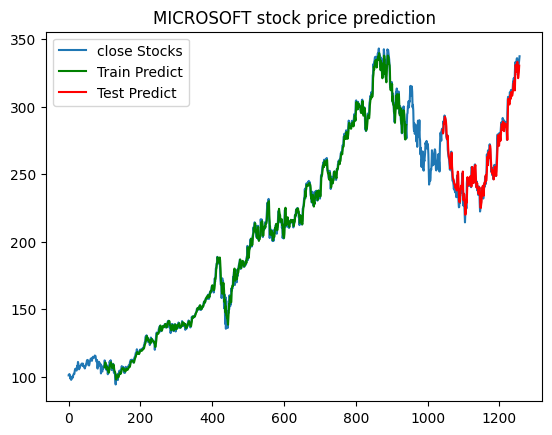

In [81]:
look_back=100
trainPredictPlot = np.empty_like(Mstocks)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = np.empty_like(Mstocks)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Mstocks)-1, :] = test_predict
# plot baseline and predictions

plt.plot(ST.inverse_transform(Mstocks) , label="close Stocks")
plt.plot(trainPredictPlot , color = "green" , label="Train Predict")
plt.plot(testPredictPlot , color = "red"  , label="Test Predict")
plt.legend()
plt.title('MICROSOFT stock price prediction')
plt.show()

**GREEN ->> TRAIN PREDICT**


  **RED ->> TEST PREDICT**